# 1. Data Analysis

processing data to Dataframe

here we use **(u.data/ u.user/ u.item) to (df.data / df.user / df.item)**

## u.user to df.user

In [1]:
import numpy as np
import pandas as pd
line1 = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/u.user',encoding="UTF-8").read()
line1 = line1.replace('\n','|')
line1 = line1.split('|')
print(len(line1))
del line1[-1]
line1 = np.array(line1).reshape((int(len(line1)/5)),5)
df_user = pd.DataFrame(line1, columns=['user id', 'age', 'gender', 'occupation', 'zip code'])
df_user

4716


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


## u.item to df.item

In [2]:
import numpy as np
import pandas as pd
line2 = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/u.item',encoding="UTF-8").read()
line2 = line2.replace('\n','|')
line2 = line2.split('|')
print(len(line2))
del line2[-1]
line2 = np.array(line2).reshape((int(len(line2)/24)),24)
df_item = pd.DataFrame(line2, columns=['movie id', 'movie title', 'release date', 
                                       'video release date', 'IMDb URL', 'unknown', 
                                       'Action', 'Adventure', 'Animation','Childrens',
                                       'Comedy','Crime','Documentary','Drama','Fantasy',
                                       'Film-Noir','Horror','Musical','Mystery','Romance',
                                       'Sci-Fi', 'Thriller', 'War', 'Western'])
del df_item['video release date']
del df_item['IMDb URL']
df_item

40369


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## u.data to df.data

In [3]:
import numpy as np
import pandas as pd
line3 = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/u.data',encoding="UTF-8").read()
line3 = line3.replace('\n','|')
line3 = line3.replace('\t','|')
line3 = line3.split('|')
print(len(line3))
del line3[-1]
line3 = np.array(line3).reshape((int(len(line3)/4)),4)
df_data = pd.DataFrame(line3, columns=['user id', 'movie id', 'rating','timestamp'])
df_data

400001


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


Merge three Dataframe to get a complete form : **df_3merge**

In [4]:
df_DMI = pd.merge(df_data, df_item)
df_3merge = pd.merge(df_user, df_DMI)
df_3merge

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,242,5,889751633,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,51,4,878543275,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
2,1,24,M,technician,85711,265,4,878542441,"Hunt for Red October, The (1990)",01-Jan-1990,...,0,0,0,0,0,0,0,1,0,0
3,1,24,M,technician,85711,86,5,878543541,"Remains of the Day, The (1993)",01-Jan-1993,...,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,257,4,874965954,Men in Black (1997),04-Jul-1997,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,1188,3,888640250,Young Guns II (1990),01-Jan-1990,...,0,0,0,0,0,0,0,0,0,1
99996,943,22,M,student,77841,415,1,888640027,"Apple Dumpling Gang, The (1975)",01-Jan-1975,...,0,0,0,0,0,0,0,0,0,1
99997,943,22,M,student,77841,373,3,888640275,Judge Dredd (1995),01-Jan-1995,...,0,0,0,0,0,0,1,0,0,0
99998,943,22,M,student,77841,541,4,888639954,Mortal Kombat (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,0


Here we try to analyze the data

check the data type

In [6]:
df_3merge.dtypes

user id         object
age             object
gender          object
occupation      object
zip code        object
movie id        object
rating          object
timestamp       object
movie title     object
release date    object
unknown         object
Action          object
Adventure       object
Animation       object
Childrens       object
Comedy          object
Crime           object
Documentary     object
Drama           object
Fantasy         object
Film-Noir       object
Horror          object
Musical         object
Mystery         object
Romance         object
Sci-Fi          object
Thriller        object
War             object
Western         object
dtype: object

change the data type or you will get error

error: **hist method requires numerical or datetime columns, nothing to plot.**

In [127]:
df_3merge['age']=df_3merge['age'].astype(int)
df_3merge['movie id']=df_3merge['movie id'].astype(int)
df_3merge['user id']=df_3merge['user id'].astype(int)
df_3merge['rating']=df_3merge['rating'].astype(int)

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

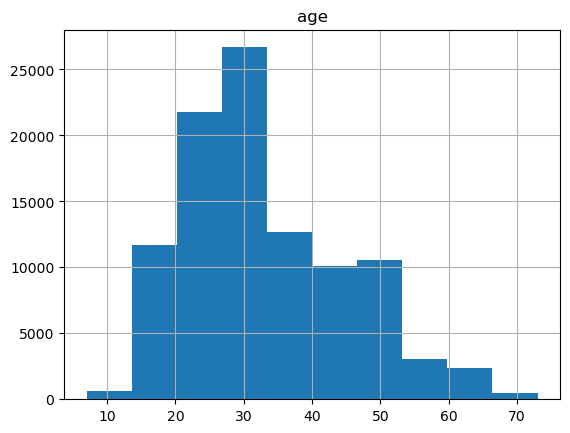

In [22]:
df_3merge.hist(column='age')

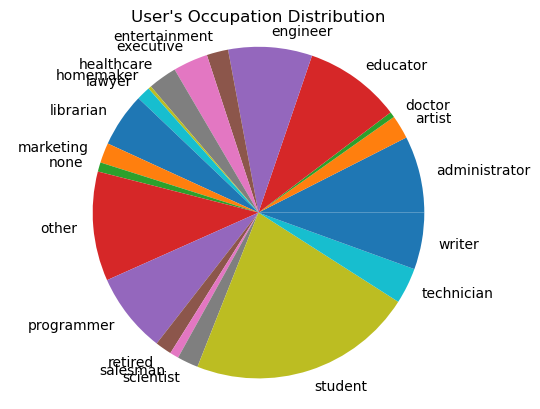

In [111]:
# occupation distrubution
occupation_count = df_3merge[['user id', "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

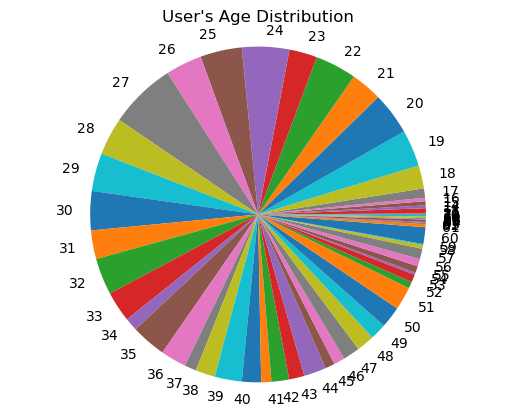

In [113]:
# age distrubution
movie_id__count = df_3merge[['user id', 'age']].groupby('age', as_index=False).size()  # count the numbers
plt.pie(movie_id__count["size"], labels=movie_id__count['age'])
plt.title("User's Age Distribution")
plt.axis("equal")
plt.show()

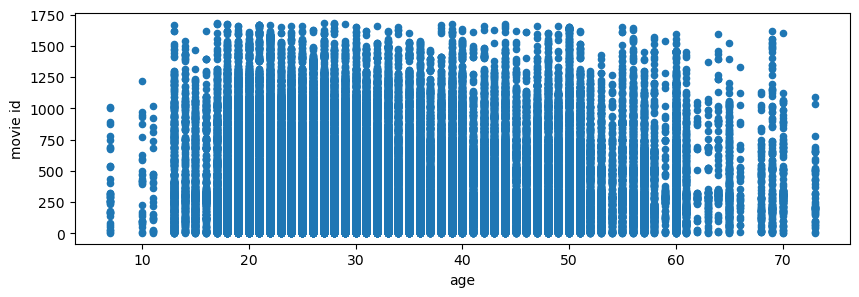

[[421.55024474]]

預測該年紀喜歡的電影 id : 
421
對應的電影名稱為: 
William Shakespeare's Romeo and Juliet (1996)


In [114]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

X = np.c_[df_3merge['age']]
Y = np.c_[df_3merge['movie id']]
# Visualize the data
df_3merge.plot(kind='scatter', x='age', y='movie id', figsize=(10,3))
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, Y)

# Make a prediction for random age
X_new = [[44]]  # input age
print(model.predict(X_new)) # outputs the movie id it recommandation
print()

predict = int(model.predict(X_new))
print("預測該年紀喜歡的電影 id : ")
print(predict)

# find the predict corresponding movie title
for i in range(len(df_3merge)):
    if (df_3merge['movie id'][i] == predict):
        print("對應的電影名稱為: ")
        print(df_3merge['movie title'][i])
        break

---
Remember to draw the picture need to check the datatype

only numeric type can be plot

In [130]:
df_3merge.dtypes

user id          int32
age              int32
gender          object
occupation      object
zip code        object
movie id         int32
rating           int32
timestamp       object
movie title     object
release date    object
unknown         object
Action          object
Adventure       object
Animation       object
Childrens       object
Comedy          object
Crime           object
Documentary     object
Drama           object
Fantasy         object
Film-Noir       object
Horror          object
Musical         object
Mystery         object
Romance         object
Sci-Fi          object
Thriller        object
War             object
Western         object
dtype: object

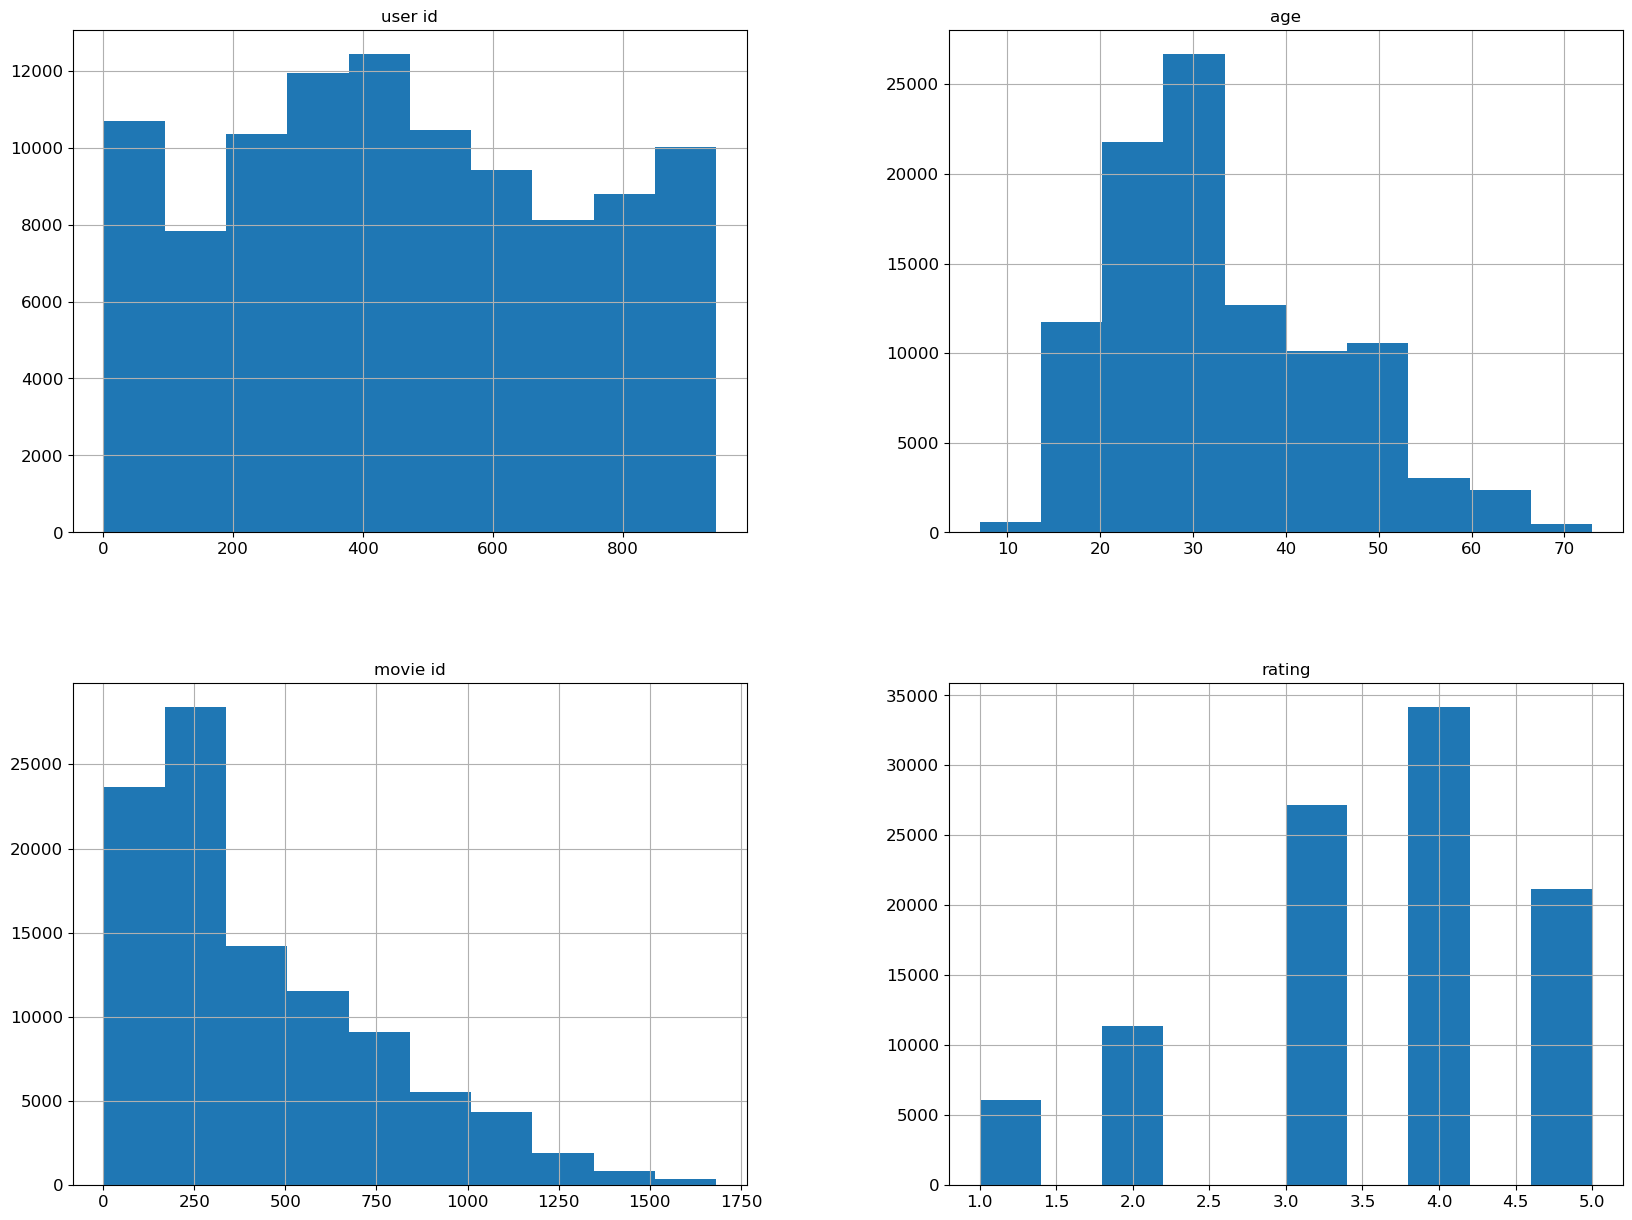

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
df_3merge.hist(bins=10, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()